## Project Overview
A comprehensive machine learning-based system for predicting employee turnover using workforce analytics. This project leverages **Supervised Machine Learning** algorithms across multiple models to identify flight-risk employees, supporting HR departments in proactive retention strategies and workforce planning.

**Industry:** Human Resources (HR)

### IMPORT THE DEPENDENCIES

In [2]:
# Import the needed libraries

# For Data Analysis
import pandas as pd
import numpy as np

# For Data Visiualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier # !pip install xgboost
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# To PRODUCTIONIZE THE MODEL
import joblib

# For Warnings
import warnings
warnings.filterwarnings("ignore")


### DATA COLLECTION AND DATA PROCESSING

In [4]:
# Load The Dataset to PandaFrame
Employee_Attrition = pd.read_csv('train.csv')

In [5]:
# Check the first 5 rows of the dataset
Employee_Attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
Employee_Attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeCount             1058 non-null   int64 
 9   EmployeeNumber            1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                

In [7]:
# Check the shape of the dataset
Employee_Attrition.shape

(1058, 35)

In [8]:
# Check the unique values in each column
{x: len(Employee_Attrition[x].unique()) for x in Employee_Attrition.columns}

{'Age': 43,
 'Attrition': 2,
 'BusinessTravel': 3,
 'DailyRate': 731,
 'Department': 3,
 'DistanceFromHome': 29,
 'Education': 5,
 'EducationField': 6,
 'EmployeeCount': 1,
 'EmployeeNumber': 1058,
 'EnvironmentSatisfaction': 4,
 'Gender': 2,
 'HourlyRate': 71,
 'JobInvolvement': 4,
 'JobLevel': 5,
 'JobRole': 9,
 'JobSatisfaction': 4,
 'MaritalStatus': 3,
 'MonthlyIncome': 991,
 'MonthlyRate': 1038,
 'NumCompaniesWorked': 10,
 'Over18': 1,
 'OverTime': 2,
 'PercentSalaryHike': 15,
 'PerformanceRating': 2,
 'RelationshipSatisfaction': 4,
 'StandardHours': 1,
 'StockOptionLevel': 4,
 'TotalWorkingYears': 40,
 'TrainingTimesLastYear': 7,
 'WorkLifeBalance': 4,
 'YearsAtCompany': 35,
 'YearsInCurrentRole': 19,
 'YearsSinceLastPromotion': 16,
 'YearsWithCurrManager': 18}

In [9]:
# Check the statistical values of the Numerical features of the dataset
Employee_Attrition.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.00000,...,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
mean,37.055766,0.169187,809.542533,8.978261,2.879017,1.0,731.753308,2.712665,65.643667,2.73724,...,2.726843,80.0,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,9.410421,0.375094,408.478049,8.040608,1.031442,0.0,431.418209,1.092959,20.324861,0.70473,...,1.090970,0.0,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.00000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,30.000000,0.000000,465.250000,2.000000,2.000000,1.0,364.500000,2.000000,48.000000,2.00000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,36.000000,0.000000,817.500000,7.000000,3.000000,1.0,723.500000,3.000000,65.000000,3.00000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,43.000000,0.000000,1168.500000,13.000000,4.000000,1.0,1101.750000,4.000000,83.000000,3.00000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1487.000000,4.000000,100.000000,4.00000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


In [10]:
# Check the statistical values of the Categorical features of the dataset
Employee_Attrition.describe(exclude='int64')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1058,1058,1058,1058,1058,1058,1058,1058
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,746,701,436,620,232,464,1058,751


### DATA PREPROCESSING

In [12]:
# Create a copy of the dataset for future use
Employee_Attrition_2 = Employee_Attrition.copy()

### Dropping off Redundant Features

In [14]:
# Droping of some redundant features
Employee_Attrition.drop(['StandardHours', 'Over18', 'EmployeeCount', 'EmployeeNumber'], axis=1, inplace=True)

### Label Encoding Using the Get Dummies method.

In [16]:
# Use one hot encoding of all the categorical features of the daataset
Employee_Attrition = pd.get_dummies(Employee_Attrition, drop_first=True)

In [17]:
Employee_Attrition.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,False,False,False,False,False,True,False,False,True,True
1,49,0,279,8,1,3,61,2,2,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1,1373,2,2,4,92,2,1,3,...,True,False,False,False,False,False,False,False,True,True
3,33,0,1392,3,4,4,56,3,1,3,...,False,False,False,False,True,False,False,True,False,True
4,27,0,591,2,1,1,40,3,1,2,...,True,False,False,False,False,False,False,True,False,False


### SEPERATE THE LABEL FROM THE FEATURE

In [19]:
# Seperate the dataset. X = Features, Y = Attrition (label)
y = Employee_Attrition.pop('Attrition')

### DATA STANDARDIZATION

In [21]:
# Scale the dataset
# This instantiate our Scaler function
Scaler = StandardScaler()

In [22]:
Scaled_Employee_Attrition = pd.DataFrame(Scaler.fit_transform(Employee_Attrition), columns=Employee_Attrition.columns)

In [23]:
# Scaled_Employee_Attrition.head()
Scaled_Employee_Attrition

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.419333,0.716307,-0.992715,-0.852624,-0.652359,1.395815,0.373028,-0.079876,1.133062,-0.130898,...,-0.464857,-0.284068,-0.33543,-0.249497,-0.503542,1.886888,-0.240832,-0.883824,1.416221,1.564051
1,1.269856,-1.299442,-0.121723,-1.822599,0.263020,-0.228580,-1.046626,-0.079876,-0.679152,-0.309373,...,-0.464857,-0.284068,-0.33543,-0.249497,1.985932,-0.529973,-0.240832,1.131447,-0.706105,-0.639366
2,-0.005929,1.380059,-0.868288,-0.852624,1.178400,1.297367,-1.046626,-0.960176,0.226955,-0.938069,...,2.151200,-0.284068,-0.33543,-0.249497,-0.503542,-0.529973,-0.240832,-0.883824,1.416221,1.564051
3,-0.431190,1.426595,-0.743860,1.087325,1.178400,-0.474701,0.373028,-0.960176,0.226955,-0.768693,...,-0.464857,-0.284068,-0.33543,-0.249497,1.985932,-0.529973,-0.240832,1.131447,-0.706105,1.564051
4,-1.069083,-0.535270,-0.868288,-1.822599,-1.567739,-1.262286,0.373028,-0.960176,-0.679152,-0.653088,...,2.151200,-0.284068,-0.33543,-0.249497,-0.503542,-0.529973,-0.240832,1.131447,-0.706105,-0.639366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,2.120380,-0.990834,-0.992715,-0.852624,-0.652359,1.346591,1.792683,-0.079876,0.226955,-0.356939,...,-0.464857,-0.284068,-0.33543,-0.249497,1.985932,-0.529973,-0.240832,1.131447,-0.706105,-0.639366
1054,1.269856,1.666624,-0.246150,1.087325,0.263020,-1.508407,0.373028,0.800424,-0.679152,0.794153,...,-0.464857,-0.284068,-0.33543,-0.249497,-0.503542,-0.529973,-0.240832,-0.883824,-0.706105,-0.639366
1055,-0.324875,0.047657,0.749270,0.117350,-0.652359,0.263661,0.373028,1.680723,-1.585259,2.146883,...,-0.464857,-0.284068,-0.33543,4.008056,-0.503542,-0.529973,-0.240832,-0.883824,-0.706105,-0.639366
1056,-0.962768,1.681320,-0.992715,0.117350,-1.567739,1.297367,0.373028,-0.960176,0.226955,-0.768693,...,-0.464857,-0.284068,-0.33543,-0.249497,-0.503542,-0.529973,4.152274,1.131447,-0.706105,-0.639366


### FEATURE IMPORTANCE

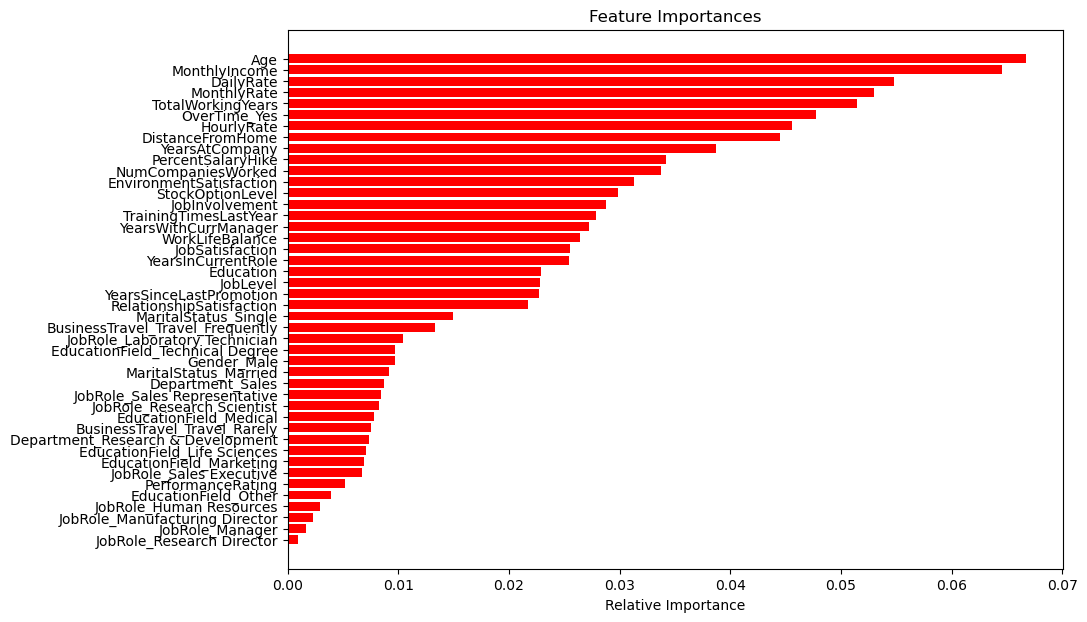

In [25]:
# Identifying Key Features fron the dataset
# Plotting a feature importance chart

Scaler = MinMaxScaler()
Scaled_Attrition = Scaler.fit_transform(Employee_Attrition, y)

Model = RandomForestClassifier()
# Fit the model
Model.fit(Scaled_Attrition, y)
feature_names = list(Employee_Attrition.columns)
importances = Model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Feature Importance visualization is generally used to figure out the most importance features or columns in a dataset.
#### This helps the Machine Learning Engineer to scale down on the best features to consider when building a model.

## MACHINE LEARNING

### SPLITTING THE DATASET TO TRAIN AND TEST DATA

In [28]:
# create four variables and split the dataset into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(Scaled_Employee_Attrition, y, test_size=0.3, random_state=1)

In [29]:
# Checking the shape of the splitted dataset
print(Employee_Attrition.shape, X_train.shape, X_test.shape)

(1058, 44) (740, 44) (318, 44)


## MODEL BUILDING
#### 1. LOGISTIC REGRESSION MODEL

In [31]:
# Building The Model Using LOGISTIC REGRESSION
# Instantiating the model
Logistic_Model = LogisticRegression()

In [32]:
# Fit the model to the Training data
Logistic_Model.fit(X_train, Y_train)

LogisticRegression()

#### Create a prediction file

In [34]:
# Create a prediction file
Log_Predict = Logistic_Model.predict(X_test)

print("Logistic Regression")
print("Accuracy", format(Logistic_Model.score(X_test, Y_test)))

Logistic Regression
Accuracy 0.8805031446540881


#### From the Accuracy Score of about 88%, this shows that Logistic Regression is predicting well. Thia is a good score.

#### 2. RANDOM FOREST CLASSIFIER

In [39]:
# Building The Model Using RANDOM FOREST CLASSIFIER

Random_Forest_Model = RandomForestClassifier()

In [40]:
# Fit the model to the Training data
Random_Forest_Model.fit(X_train, Y_train)

RandomForestClassifier()

In [41]:
# Create a prediction file
RFC_Predict = Random_Forest_Model.predict(X_test)

print("RADOM FOREST CLASSIFIER")
print("Accuracy", format(Random_Forest_Model.score (X_test, Y_test)))

RADOM FOREST CLASSIFIER
Accuracy 0.8144654088050315


#### From the Accuracy Score of about 88%, this shows that Random Forest Classifier is predicting well. Thia is a good score.

#### 3. DECISION TREE CLASSIFIER

In [44]:
# Building The Model Using RANDOM FOREST CLASSIFIER
Decision_Tree_Model = DecisionTreeClassifier()

In [45]:
# Fit the model to the Training data
Decision_Tree_Model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [46]:
# Create a Prediction File
Decision_Predict = Decision_Tree_Model.predict(X_test)

print("DECISION TREE CLASSIFIER")
print("Accuracy", format(Decision_Tree_Model.score(X_test, Y_test)))

DECISION TREE CLASSIFIER
Accuracy 0.7641509433962265


#### From the Accuracy Score of about 88%, this shows that Decision Tree Classifier is predicting well. Thia is a good score.

#### 4. GRADIENT BOOSTING CLASSIFIER

In [49]:
# Building The Model Using GRADIENT BOOSTING CLASSIFIER
# Instantiate The Model
Gradient_Boosting_model = GradientBoostingClassifier()

In [50]:
#Train The Model
Gradient_Boosting_model.fit(X_train, Y_train)

GradientBoostingClassifier()

In [51]:
# Create a Prediction File
Gradient_Boosting_Predict = Gradient_Boosting_model.predict(X_test)

print("GRADIENT BOOSTING CLASSIFIER")
print("Accuracy", format(Gradient_Boosting_model.score(X_test, Y_test)))

GRADIENT BOOSTING CLASSIFIER
Accuracy 0.8301886792452831


#### From the Accuracy Score of about 88%, this shows that Gradient Boosting Classifier is predicting well. Thia is a good score.

### EVALUATE MODEL PERFORMANCE

In [54]:
# Classification Report on the Logistic Regression Model
print(classification_report(Y_test, Log_Predict))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       257
           1       0.81      0.49      0.61        61

    accuracy                           0.88       318
   macro avg       0.85      0.73      0.77       318
weighted avg       0.87      0.88      0.87       318



In [55]:
# Create Confusion Metrics to visualize your models performance
# A helpful function to Visualize the Confusion Metrics

def confusion_matrix_sklearn(model, predictors, target):
    """""
    To plot the Confusion Metrix with percentages

    Model: Classifier
    Predictors: independent variables
    Target: dependent variables
    """""
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}". format(item) + "\n{0:.2%}" .format(item / cm.flatten(). sum()) ]
            for item in cm.flatten()

            
        ]
    ).reshape(2, 2)


    plt.figure(figsize= (6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")


#### 1. CONFUSION MATRX FOR LOGISTIC REGRESSION MODEL

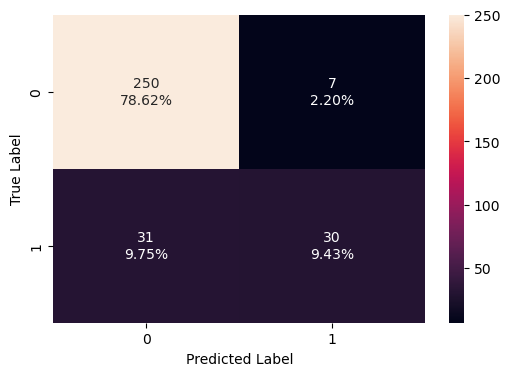

In [56]:
confusion_matrix_sklearn(Logistic_Model, X_test, Y_test)

#### From the Confusion Matrix Visualization above for **LOGISTIC REGRESSION MODEL**, it correctly predicted that 250 employees, which is about 78.62% do not have attrition. It also correctly predicted that 30 employees, which is about 9.43% have attrition.
#### It also predicted 31 employees have attrition, which is about 9.75%, when actually they do not have attrition.

#### 2. CONFUSION MATRX FOR RANDOM FOREST CLASSIFIER MODEL

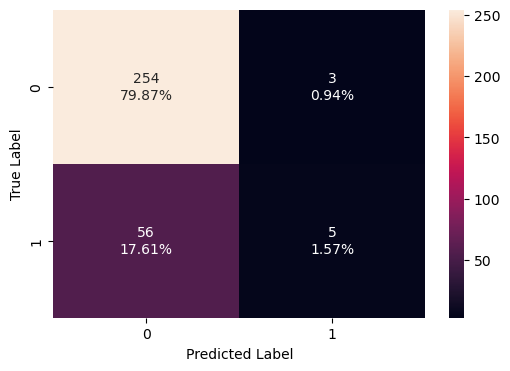

In [57]:
confusion_matrix_sklearn(Random_Forest_Model, X_test, Y_test)

#### From the Confusion Matrix Visualization above for **RANDOM FOREST CLASSIFIER MODEL**, it correctly predicted that 254 employees, which is about 79.87% do not have attrition. It also correctly predicted that 5 employees, which is about 1.57% have attrition.
#### It also predicted 56 employees have attrition, which is about 17.61%, when actually they do not have attrition.

#### 3. CONFUSION MATRX FOR DECISION TREE CLASSIFIER MODEL

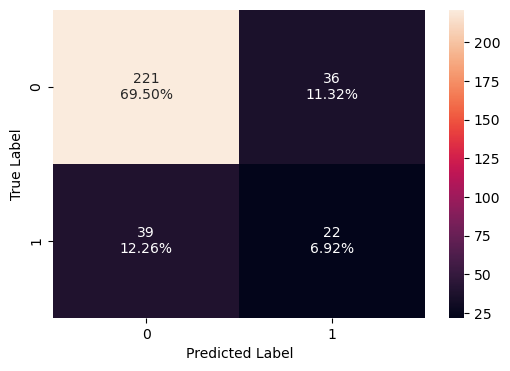

In [164]:
confusion_matrix_sklearn(Decision_Tree_Model, X_test, Y_test)

#### From the Confusion Matrix Visualization above for **DECISION TREE CLASSIFIER MODEL**, it correctly predicted that 221 employees, which is about 69.50% do not have attrition. It also correctly predicted that 22 employees, which is about 6.92% have attrition.
#### It also predicted 39 employees have attrition, which is about 12.26%, when actually they do not have attrition.

#### 4. CONFUSION MATRX FOR GRADIENT BOOSTING CLASSIFIER MODEL

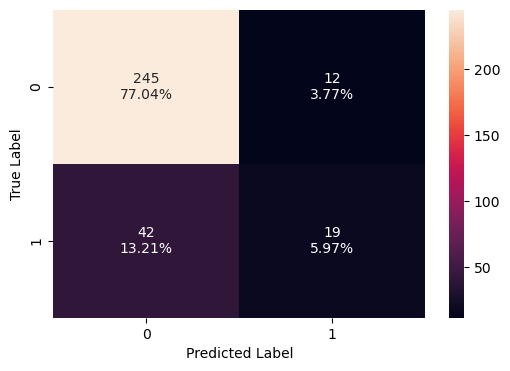

In [171]:
confusion_matrix_sklearn(Gradient_Boosting_model, X_test, Y_test)

#### From the Confusion Matrix Visualization above for **GRADIENT BOOSTING CLASSIFIER MODEL**, it correctly predicted that 245 employees, which is about 71.04% do not have attrition. It also correctly predicted that 19 employees, which is about 5.97% have attrition.
#### It also predicted 42 employees have attrition, which is about 13.21%, when actually they do not have attrition.

### HYPERPARAMETER OPTIMIZATION OF MODELS

In [59]:
# To find the best parameter for the model
params = {
    'learning_rate': [0.1, 0.5, 1.0],
    'n_estimators' : [50, 100, 150]
}


# To find the best parameter for the model
score = make_scorer(r2_score)
grid = GridSearchCV(Gradient_Boosting_model, params, scoring= score, cv=3, return_train_score=True)
grid.fit(X_train, Y_train)
print(grid.best_params_, "\n")

{'learning_rate': 0.1, 'n_estimators': 50} 



#### What the Grid Search does is go through the number of parameters that we have and it would try to identify the best parameter to use for the model.
#### From the above output, the best parameter that will give me the optimal model performance is the Learning rate as 0.1, and the number of extimators as 50.
#### I can now apply this to the X_test dataset.

### Applying the Hyperparameter output to the X_test dataset

In [60]:
# Applying the Hyperparameter output to the X_test dataset
Best_model = grid.best_estimator_
New_predict = Best_model.predict(X_test)
print(New_predict)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0]


### Evaluate Using Clasification Report

In [61]:
print(classification_report(Y_test, New_predict))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       257
           1       0.57      0.21      0.31        61

    accuracy                           0.82       318
   macro avg       0.70      0.59      0.60       318
weighted avg       0.79      0.82      0.78       318



#### After using Hyperparameter on the model, the outcome is generally low interms of the scores

### PRODUCTIONIZE THE MODEL

In [63]:
# Create a file name to store the model.
filename = './Logistic_Model.pkl'
joblib.dump(Logistic_Model, filename)

['./Logistic_Model.pkl']

# THE TEST DATASET

In [65]:
# Import the Test dataset to pandas dataframe
Test_Data = pd.read_csv('test.csv')

In [66]:
# Droping of some redundant features
Test_Data.drop(['StandardHours', 'Over18', 'EmployeeCount', 'EmployeeNumber'], axis=1, inplace=True)

In [67]:
# Use one hot encoding of all the categorical features of the daataset
Test_Data = pd.get_dummies(Test_Data, drop_first=True)

In [68]:
# Create a pediction file
Prediction = Logistic_Model.predict(Test_Data)

In [69]:
# Create a New Column for Prediction
Test_Data['Predictions'] = Prediction

In [70]:
Test_Data.head(3)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Predictions
0,34,790,24,4,1,40,2,2,2,4599,...,False,False,False,False,True,False,False,True,True,1
1,35,660,7,1,4,76,3,1,3,2404,...,False,False,False,False,False,True,True,False,False,1
2,24,381,9,3,2,89,3,1,1,3172,...,False,False,False,False,False,False,False,True,True,1
